In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

In [2]:
df = pd.read_csv(r'datasets\master.csv')

In [3]:
df = pd.DataFrame(df)

In [4]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [5]:
alb_df_1524 = df[(df['country'] == 'Albania') & (df['age'] == '15-24 years')]
alb_df_1524 = alb_df_1524.set_index('year')

<AxesSubplot:xlabel='year'>

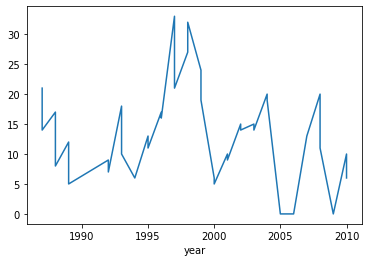

In [7]:
alb_df_1524['suicides_no'].plot(kind = 'line')

In [8]:
age_ratedf = pd.DataFrame()

In [9]:
age_ratedf = df['suicides_no'][df['age'] == '15-24 years'].sum()
age_rateli = []

for i in sorted(df['age'].unique()):
    age_rateli.append(df['suicides_no'][df['age'] == str(i)].sum())

In [10]:
age_ratedf = [sorted(list(df['age'].unique())), age_rateli]

In [11]:
age_ratedf = pd.DataFrame(age_ratedf)

In [12]:
age_ratedf = age_ratedf.transpose()

In [14]:
age_ratedf.columns = ['age group', 'total suicides']
age_ratedf

,age group,total suicides
0,15-24 years,808542
1,25-34 years,1123912
2,35-54 years,2452141
3,5-14 years,52264
4,55-74 years,1658443
5,75+ years,653118


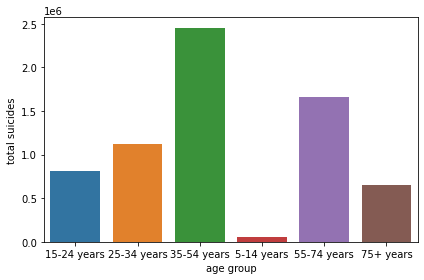

In [15]:
sns.barplot(x = 'age group', y = 'total suicides', data = age_ratedf)
plt.tight_layout()

In [38]:
df.drop('HDI for year', axis = 1, inplace = True)

In [33]:
df['HDI for year'].isnull().sum()

19456